In [1]:
!pip install --upgrade jax jaxlib

Requirement already up-to-date: jax in /usr/local/lib/python3.6/dist-packages (0.1.72)
Requirement already up-to-date: jaxlib in /usr/local/lib/python3.6/dist-packages (0.1.51)


In [2]:
import numpy as np
import jax.numpy as np
from jax import grad, numpy
from jax import value_and_grad

In [3]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

/usr/local/lib/python3.6/dist-packages/jax/lax/lax.py:5591: UserWarning: Explicitly requested dtype <class 'float'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [4]:
def predict(W, b, inputs):
    return (inputs * W) + b

# Build a toy dataset.
inputs = xs
targets = ys

# Training loss MSE
def loss(W, b):
    preds = predict(W, b, inputs)
    loss = np.sum((preds - targets) ** 2) / 6
    return loss

# Initializing the b to be constant at -1 and W to start at 8.
W = np.array(8, dtype=np.float32)
b = np.array(-1, dtype=np.float32)

In [5]:
loss(2,-1)

DeviceArray(0., dtype=float32)

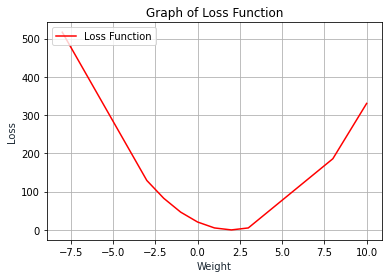

In [6]:
import matplotlib.pyplot as plt
import numpy as np
w = np.asarray([-8, -3, -2, -1, 0, 1, 2, 3, 8, 10])
l = []

for i in range(10):
  l.append(loss(w[i], -1))

plt.plot(w, l, '-r', label='Loss Function')
plt.title('Graph of Loss Function')
plt.xlabel('Weight', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [7]:
W_array = []
L_array = []
for i in range(50):
  print('Loop starts -----------------------------------')
  print('W_old', W)
  # Appending the W to a list for visualization later.
  W_array.append(W)
  loss_value, W_grad = value_and_grad(loss, 0)(W, b)
  L_array.append(loss_value)

  if loss_value != 0:
    W = W - ((0.01) * W_grad)
    
    print('W_new', W)
    print('loss is ', loss_value)
    print('Loop ends ------------------------------------')
  else:
    print('W', W)
    print('loss is ', loss_value)
    print('Loop ends ------------------------------------')
    break

Loop starts -----------------------------------
W_old 8.0
W_new 7.38
loss is  186.0
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 7.38
W_new 6.8240666
loss is  149.54607
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 6.8240666
W_new 6.3255796
loss is  120.236694
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 6.3255796
W_new 5.878603
loss is  96.67163
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 5.878603
W_new 5.477814
loss is  77.72507
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 5.477814
W_new 5.11844
loss is  62.491825
Loop ends ------------------------------------
Loop starts -----------------------------------
W_old 5.11844
W_new 4.796201
loss is  50.24412
Loop ends ------------------------------------
Loop star

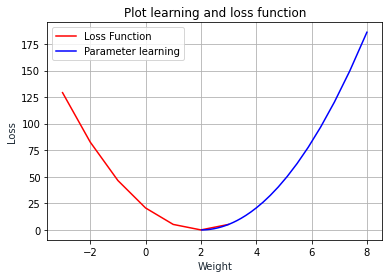

In [8]:
import matplotlib.pyplot as plt
import numpy as np
w = np.asarray([-3, -2, -1, 0, 1, 2, 3])
l = []

for i in range(7):
  l.append(loss(w[i], -1))

plt.plot(w, l, '-r', label='Loss Function')
plt.plot(W_array, L_array, '-b', label='Parameter learning')
plt.title('Plot learning and loss function')
plt.xlabel('Weight', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()